In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

In [3]:
train_df = pd.read_csv('../feature_engineering/data_train.csv')   
test_df = pd.read_csv('../feature_engineering/data_test_final.csv')     

Accuracy (độ chính xác): 0.58
Precision (macro-average): 0.56
Recall (macro-average): 0.52
F1-score (macro-average): 0.53

Classification Report:
                                precision    recall  f1-score   support

Di động / Mỏng nhẹ / Ultrabook       0.73      0.54      0.62        96
                        Gaming       0.58      0.74      0.65        66
          Kỹ thuật / Lập trình       0.55      0.62      0.58        81
    Laptop 2 trong 1 / Cảm ứng       0.73      0.40      0.52        20
  Thiết kế đồ họa / Multimedia       0.55      0.57      0.56        89
           Văn phòng / Học tập       0.23      0.25      0.24        20

                      accuracy                           0.58       372
                     macro avg       0.56      0.52      0.53       372
                  weighted avg       0.59      0.58      0.58       372



C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


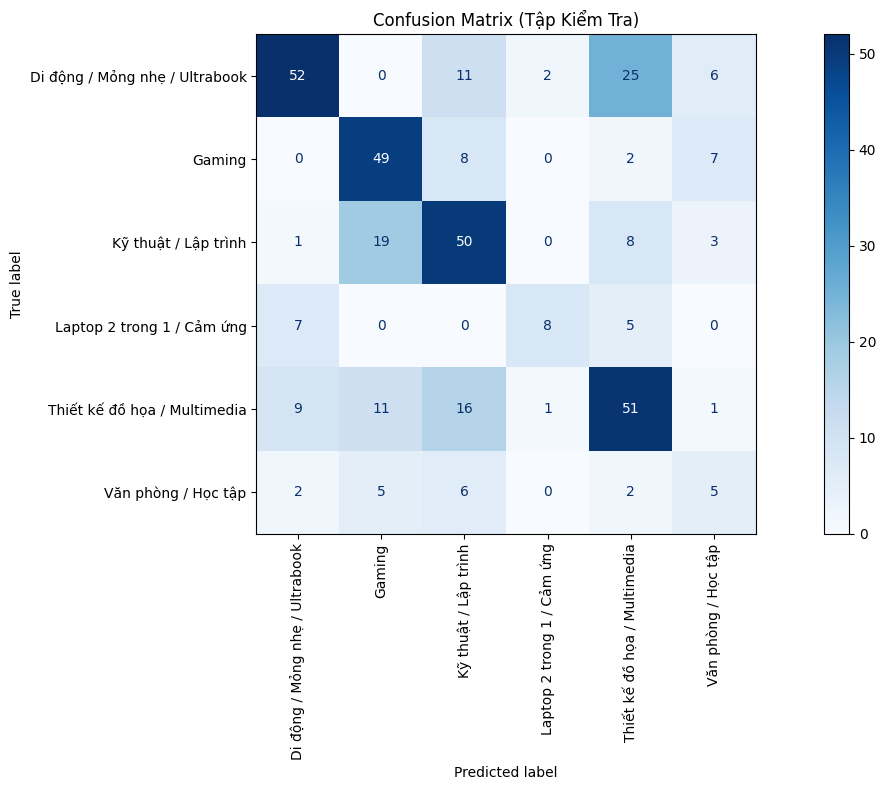

In [22]:
X_train = train_df.drop('Phân Loại', axis=1)
y_train = train_df['Phân Loại']
X_test = test_df.drop('Phân Loại', axis=1)
y_test = test_df['Phân Loại']

# Tạo mô hình MLPClassifier 
mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', 
                    solver='adam', alpha=0.0001, 
                    max_iter=500, random_state=42)
# Huấn luyện mô hình trên tập huấn luyện
mlp.fit(X_train, y_train)

# Đánh giá mô hình ban đầu trên tập kiểm tra
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Dự đoán nhãn trên tập kiểm tra
y_pred = mlp.predict(X_test)

# Tính các chỉ số Accuracy, Precision, Recall, F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Accuracy (độ chính xác): {:.2f}".format(accuracy))
print("Precision (macro-average): {:.2f}".format(precision))
print("Recall (macro-average): {:.2f}".format(recall))
print("F1-score (macro-average): {:.2f}".format(f1))

# In báo cáo phân loại chi tiết (precision, recall, f1 cho từng lớp)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Tạo và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

fig, ax = plt.subplots(figsize=(14, 8))  
disp.plot(cmap='Blues', ax=ax, xticks_rotation=90)  
plt.title("Confusion Matrix (Tập Kiểm Tra)")
plt.tight_layout()  
plt.show()

Best parameters found: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}
Best cross-validation Accuracy: 0.70

Kết quả trên tập kiểm tra (sau tối ưu theo Accuracy):
Accuracy: 0.61
Precision (macro): 0.60
Recall (macro): 0.55
F1-score (macro): 0.56

Classification Report:
                                precision    recall  f1-score   support

Di động / Mỏng nhẹ / Ultrabook       0.73      0.59      0.66        96
                        Gaming       0.61      0.85      0.71        66
          Kỹ thuật / Lập trình       0.57      0.60      0.59        81
    Laptop 2 trong 1 / Cảm ứng       0.62      0.40      0.48        20
  Thiết kế đồ họa / Multimedia       0.55      0.57      0.56        89
           Văn phòng / Học tập       0.55      0.30      0.39        20

                      accuracy                           0.61       372
                     macro avg       0.60      0.55      0.56       372
                  weighted avg  

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


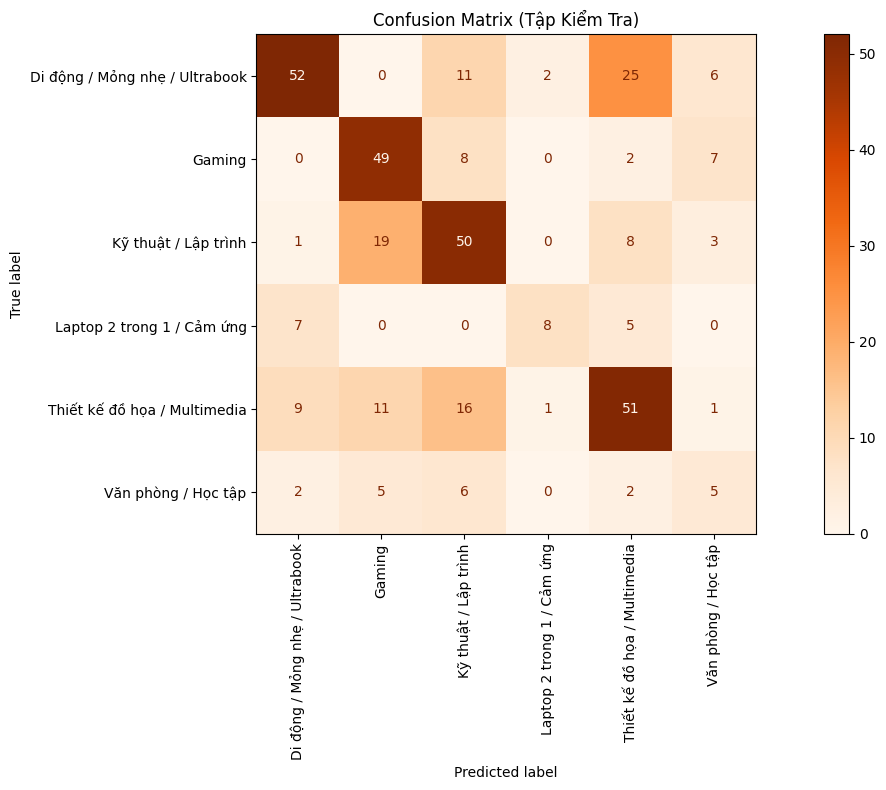

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Định nghĩa lưới tham số cần tối ưu
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50), (100, 100)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01]
}

# GridSearchCV 
grid_search = GridSearchCV(
    estimator=MLPClassifier(max_iter=500, random_state=42),
    param_grid=param_grid,
    cv = 5,
    scoring='accuracy',        
    n_jobs=-1
)

# Huấn luyện mô hình trên tập huấn luyện
grid_search.fit(X_train, y_train)

# Thông tin tham số tốt nhất
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Đánh giá mô hình tốt nhất trên tập kiểm tra
best_mlp = grid_search.best_estimator_
y_pred_best = best_mlp.predict(X_test)

# Tính các chỉ số đánh giá
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='macro')
recall_best = recall_score(y_test, y_pred_best, average='macro')
f1_best = f1_score(y_test, y_pred_best, average='macro')

print("\nKết quả trên tập kiểm tra (sau tối ưu theo Accuracy):")
print("Accuracy: {:.2f}".format(accuracy_best))
print("Precision (macro): {:.2f}".format(precision_best))
print("Recall (macro): {:.2f}".format(recall_best))
print("F1-score (macro): {:.2f}".format(f1_best))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)

fig, ax = plt.subplots(figsize=(14, 8))  
disp.plot(cmap='Oranges', ax=ax, xticks_rotation=90)  
plt.title("Confusion Matrix (Tập Kiểm Tra)")
plt.tight_layout()  
plt.show()


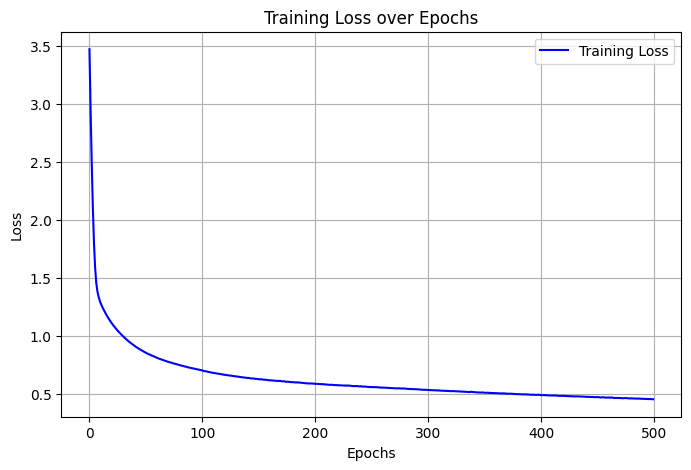

In [25]:
loss_values = mlp.loss_curve_

plt.figure(figsize=(8, 5))
plt.plot(loss_values, label='Training Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

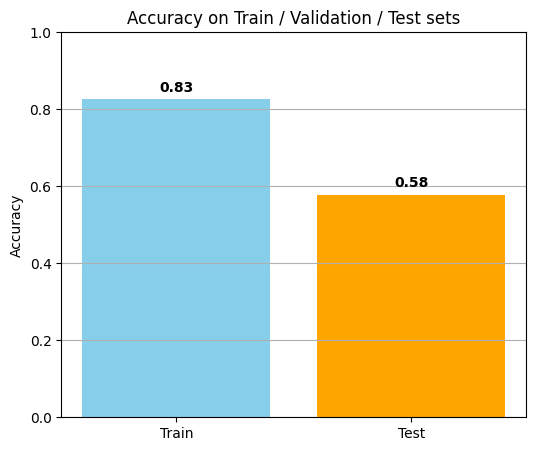

In [27]:
from sklearn.metrics import accuracy_score

# Đánh giá độ chính xác
acc_train = accuracy_score(y_train, mlp.predict(X_train))
acc_test = accuracy_score(y_test, mlp.predict(X_test))

# Vẽ biểu đồ cột
plt.figure(figsize=(6, 5))
plt.bar(['Train', 'Test'], [acc_train, acc_test],
        color=['skyblue', 'orange', 'green'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy on Train / Validation / Test sets')
for i, v in enumerate([acc_train, acc_test]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.grid(axis='y')
plt.show()
